<a href="https://colab.research.google.com/github/Ximenaloranca/Ecuaciones-Diferenciales-Parciales-/blob/main/Diferencias_progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diferencias progresivas**
En este codigo realizamos la solucion del siguiente problema de la ecuacion de calor con el metodo de diferencias progresivas, vamos a comparar las distintas soluciones  y vamos a analizar que es lo que pasa.

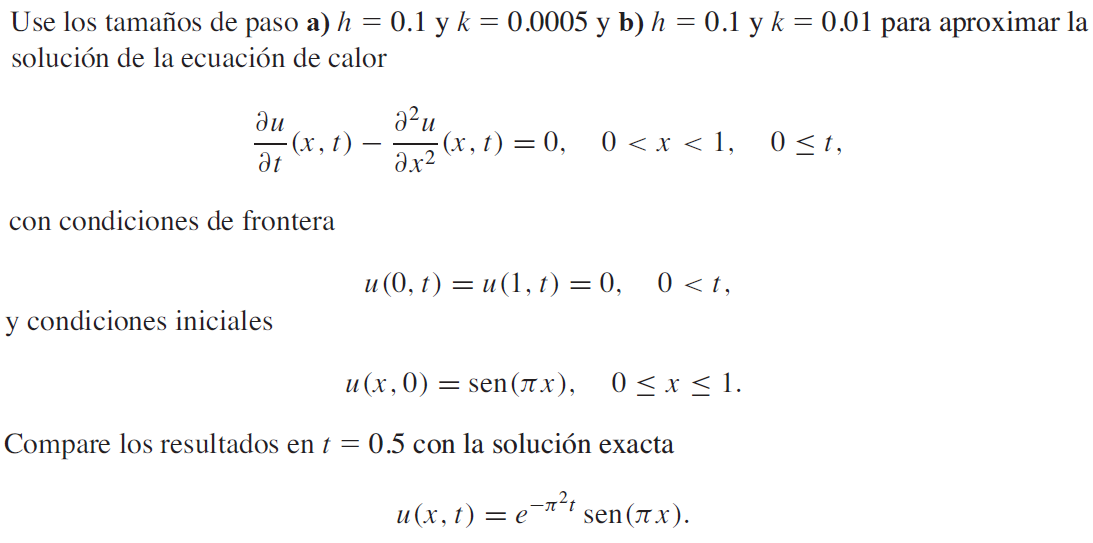

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [15]:
# Parámetros
L = 1 #Longitud del dominio
T = 0.5 #tiempo


In [42]:
# Solución analítica
def u_exacta(x, t):
  return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)


En esta parte se calculan los puntos espaciales y temporales, crea una malla que le puse U en la que se guardan los valores de la solución, usamos la condición inicial del problema y las condiciones de frontera, en esta parte se calcula el número de estabilidad, usamos el método de diferencias progresivas, para devolver los vectores x, t y la U.

In [41]:
# Función para resolver la ecuación del calor

def solucion_ecuacion_calor(L, T, h, k):
  M = int(L / h) + 1
  N = int(T / k) + 1
  x = np.linspace(0, L, M)
  t = np.linspace(0, T, N)
  U = np.zeros((N, M))
  U[0, :] = np.sin(np.pi * x)
  U[:, 0] = 0
  U[:, -1] = 0
  r = k / h**2
  for j in range(0, N - 1):
    for i in range(1, M - 1):
      U[j + 1, i] = U[j, i] + r * (U[j, i + 1] - 2 * U[j, i] + U[j, i - 1])
  return x, t, U


Creamos la tabla entre la solución exacta y la numerica en t=0.5

In [43]:
# Función para generar la tabla de comparación
def generar_tabla_comparacion(x, u_num, u_exacta):
  diferencias = np.abs(u_exacta - u_num)
  tabla_datos = []
  for i in range(len(x)):
    tabla_datos.append([x[i], u_exacta[i], u_num[i], diferencias[i]])
  encabezado = ["x_i", "u(x_i, 0.5) (Exacta)", "w_{i,N} (Numérica)", "|u(x_i, 0.5) - w_{i,N}|"]
  return tabulate(tabla_datos, headers=encabezado, tablefmt="pipe")

In [21]:
# Tamaños de paso
h1 = 0.1
k1 = 0.0005

h2 = 0.1
k2 = 0.01

In [44]:
# Calculamos las soluciones numéricas
x1, t1, U1 = solucion_ecuacion_calor(L, T, h1, k1)
x2, t2, U2 = solucion_ecuacion_calor(L, T, h2, k2)


In [45]:
# Evaluamos la solución exacta en t=0.5
u_exacta_t1 = u_exacta(x1, T)
u_exacta_t2 = u_exacta(x2, T)


In [23]:
# Generamos las tablas de comparación
tabla1 = generar_tabla_comparacion(x1, U1[-1, :], u_exacta_t1)
tabla2 = generar_tabla_comparacion(x2, U2[-1, :], u_exacta_t2)



In [46]:
# Imprimimos las tablas
print("Tabla con h=0.1 y k=0.0005:\n", tabla1)
print("\nTabla con h=0.1 y k=0.01:\n", tabla2)


Tabla con h=0.1 y k=0.0005:
 |   x_i |   u(x_i, 0.5) (Exacta) |   w_{i,N} (Numérica) |   |u(x_i, 0.5) - w_{i,N}| |
|------:|-----------------------:|---------------------:|--------------------------:|
|   0   |            0           |           0          |               0           |
|   0.1 |            0.00222241  |           0.00228652 |               6.41066e-05 |
|   0.2 |            0.00422728  |           0.00434922 |               0.000121938 |
|   0.3 |            0.00581836  |           0.00598619 |               0.000167833 |
|   0.4 |            0.00683989  |           0.00703719 |               0.0001973   |
|   0.5 |            0.00719188  |           0.00739934 |               0.000207453 |
|   0.6 |            0.00683989  |           0.00703719 |               0.0001973   |
|   0.7 |            0.00581836  |           0.00598619 |               0.000167833 |
|   0.8 |            0.00422728  |           0.00434922 |               0.000121938 |
|   0.9 |            0.00

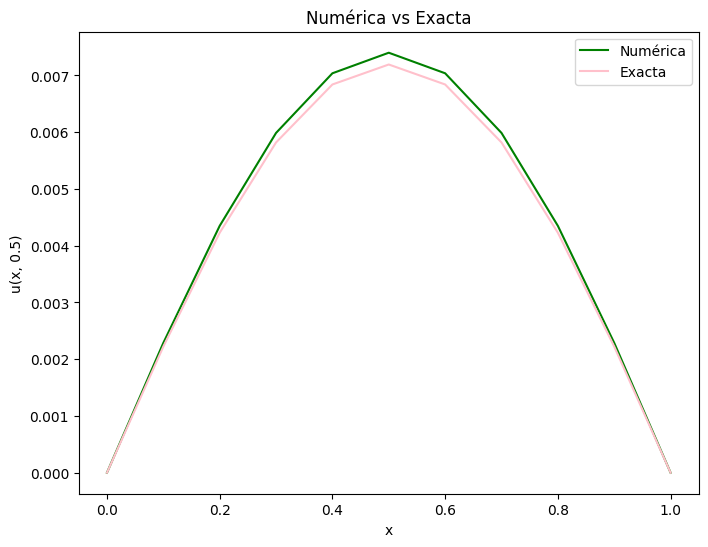

In [39]:

# Gráfica 1 para: h=0.1 y k=0.0005
plt.figure(figsize=(8, 6))
plt.plot(x1, U1[-1, :],color='green', label='Numérica')
plt.plot(x1, u_exacta_t1,color='pink', label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title('Numérica vs Exacta')
plt.legend()
plt.show()


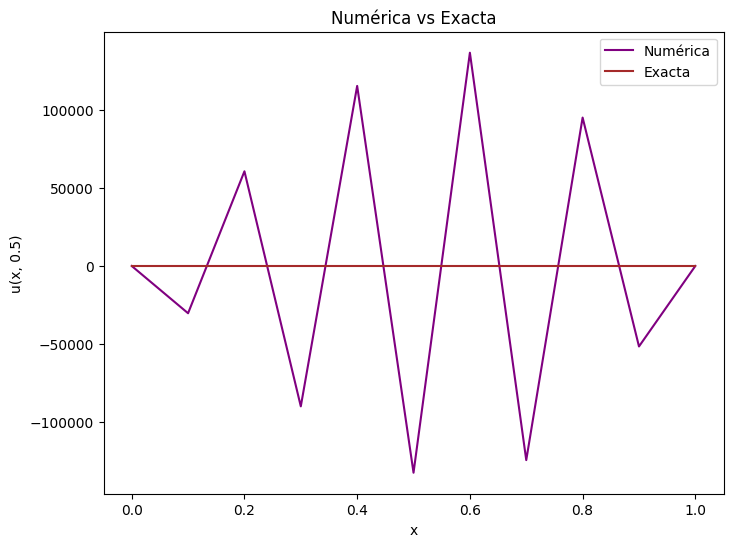

In [38]:

# Gráfica 2 h=0.1 y k=0.01
plt.figure(figsize=(8, 6))
plt.plot(x2, U2[-1, :],color='purple', label='Numérica')
plt.plot(x2, u_exacta_t2,color='brown', label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x, 0.5)')
plt.title('Numérica vs Exacta')
plt.legend()
plt.show()



**Explicación de las diferencias.**
Con la grafica 1 podemos ver que la solucion numerica es mas parecida a la exacta, pero conforme aumenta k, la solucion numerica se hace inestable y ya no se parece a la exacta. Todo esto pasa porque el metodo de diferencias necesita que el numero de estabilidad sea chiquito para que sea estable